# Install Libraries if Needed (Only Run Once)

In [ ]:
!pip install -U deepxde

# Import Libraries

In [1]:
# Interactive Plotting

# for jupyter notebooks
%matplotlib notebook 

# for jupyter labs
# %matplotlib widget 

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import io
import re

import matplotlib.pyplot as plt
import numpy as np

import deepxde as dde
from deepxde.backend import tf

from mpl_toolkits.mplot3d import Axes3D
import sys
from scipy.integrate import odeint
import matplotlib.tri as tri
from mpl_toolkits import mplot3d
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using backend: tensorflow.compat.v1

2021-11-17 10:43:32.746129: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term



# Poisson Equation
$$
\nabla^2 u(x,y) = -1,\quad (x,y) \in \Omega, \\
u(x,y) = 0, \quad (x,y) \in \partial \Omega, \\
\Omega = [-1, 1]^2 \ \backslash \ [0,1]^2
$$

# Define PDE

In [3]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1

# Define Geometry

In [4]:
geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])

# Define BC

In [5]:
def boundary(_, on_boundary):
    return on_boundary

bc = dde.DirichletBC(geom, lambda x: 0, boundary)

# Define Data (PDE + BC + Geometry)

In [6]:
data = dde.data.PDE(geom, pde, bc, num_domain=2500, num_boundary=500, num_test=1500)

/home/shawngr2/.local/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+508=508. 
  warnings.warn("The balance properties of Sobol' points require "


# Define Network Architecture

In [7]:
net = dde.maps.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")

# Define Model (Data + Net)

In [8]:
model = dde.Model(data, net)

# Train the Model
Here we train the model twice.  Once with Adam optimizer for initial training.  Then again with L-BFGS-B optimizer for finetuning.

In [9]:
model.compile("adam", lr=0.001)
model.train(epochs=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.067268 s



/opt/miniconda3/envs/opence-v1.3.1/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/opt/miniconda3/envs/opence-v1.3.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-11-17 10:44:09.587475: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-17 10:44:09.722213: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1731] Found device 0 with properties: 
pciBusID: 0004:04:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.00GiB deviceMemory

'compile' took 1.136811 s

Initializing variables...
Training model...



2021-11-17 10:44:10.691909: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3783000000 Hz
2021-11-17 10:44:10.823405: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


Step      Train loss              Test loss               Test metric
0         [9.59e-01, 1.23e-01]    [9.54e-01, 1.23e-01]    []  


2021-11-17 10:44:11.107834: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1000      [1.53e-04, 3.23e-03]    [1.19e-04, 3.23e-03]    []  
2000      [1.13e-04, 2.85e-03]    [8.34e-05, 2.85e-03]    []  
3000      [2.41e-04, 2.21e-03]    [1.80e-04, 2.21e-03]    []  
4000      [2.14e-04, 1.27e-03]    [1.45e-04, 1.27e-03]    []  
5000      [5.33e-04, 5.38e-04]    [5.11e-04, 5.38e-04]    []  
6000      [1.28e-04, 3.41e-04]    [1.06e-04, 3.41e-04]    []  
7000      [1.37e-04, 2.72e-04]    [1.34e-04, 2.72e-04]    []  
8000      [3.53e-05, 2.02e-04]    [3.09e-05, 2.02e-04]    []  
9000      [1.02e-03, 2.04e-04]    [1.10e-03, 2.04e-04]    []  
10000     [6.47e-04, 1.85e-04]    [6.38e-04, 1.85e-04]    []  
11000     [2.62e-05, 1.69e-04]    [2.70e-05, 1.69e-04]    []  
12000     [2.30e-05, 1.64e-04]    [2.29e-05, 1.64e-04]    []  
13000     [2.04e-05, 1.61e-04]    [1.81e-05, 1.61e-04]    []  
14000     [2.08e-05, 1.58e-04]    [2.14e-05, 1.58e-04]    []  
15000     [1.92e-05, 1.52e-04]    [1.86e-05, 1.52e-04]    []  
16000     [2.47e-04, 1.80e-04]    [2.33e-04, 1.80e-04] 

# Plot Loss and Predictions

Saving loss history to /home/shawngr2/HAL-Physics-Informed-AI-Tutorial/loss_Poisson_Lshape.dat ...
Saving training data to /home/shawngr2/HAL-Physics-Informed-AI-Tutorial/train_Poisson_Lshape.dat ...
Saving test data to /home/shawngr2/HAL-Physics-Informed-AI-Tutorial/test_Poisson_Lshape.dat ...


<IPython.core.display.Javascript object>


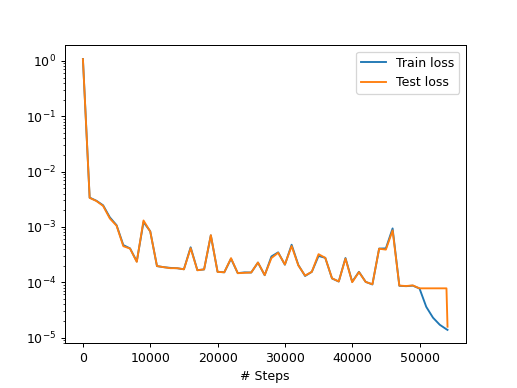

<IPython.core.display.Javascript object>


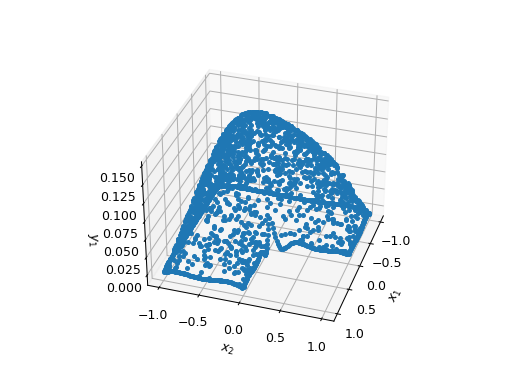

In [10]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True, loss_fname='loss_Poisson_Lshape.dat', train_fname='train_Poisson_Lshape.dat',test_fname='test_Poisson_Lshape.dat')

# Get Predictions

In [11]:
def load_test_data(file='dataset/Poisson_Lshape.npz'):
    data = np.load(file)
    X_test = data['X_test']
    y_test = data['y_ref']
    return X_test, y_test

In [12]:
file = 'dataset/Poisson_Lshape.npz'
X_test, y_test = load_test_data(file)

# Predict on Test Data

In [13]:
y_pred = model.predict(X_test)

# Evaluate on Test Data

In [14]:
not_nan = ~np.isnan(y_test[:,0])

print("L2 relative error:", dde.metrics.l2_relative_error(y_test[not_nan], y_pred[not_nan]))

L2 relative error: 0.11903222523846382


# Plot Results

In [15]:
not_nan

array([ True,  True,  True, ..., False, False, False])

In [16]:
X = X_test[not_nan,0]
Y = X_test[not_nan,1]
Y_test = y_test[not_nan,0]
Y_pred = y_pred[not_nan,0]


In [17]:
triang = tri.Triangulation(X, Y)
x_triang = X[triang.triangles].mean(axis=1)
y_triang = Y[triang.triangles].mean(axis=1)
zero = np.zeros_like(x_triang)
triang.set_mask(np.greater(x_triang,zero) & np.greater(y_triang,zero))

<IPython.core.display.Javascript object>


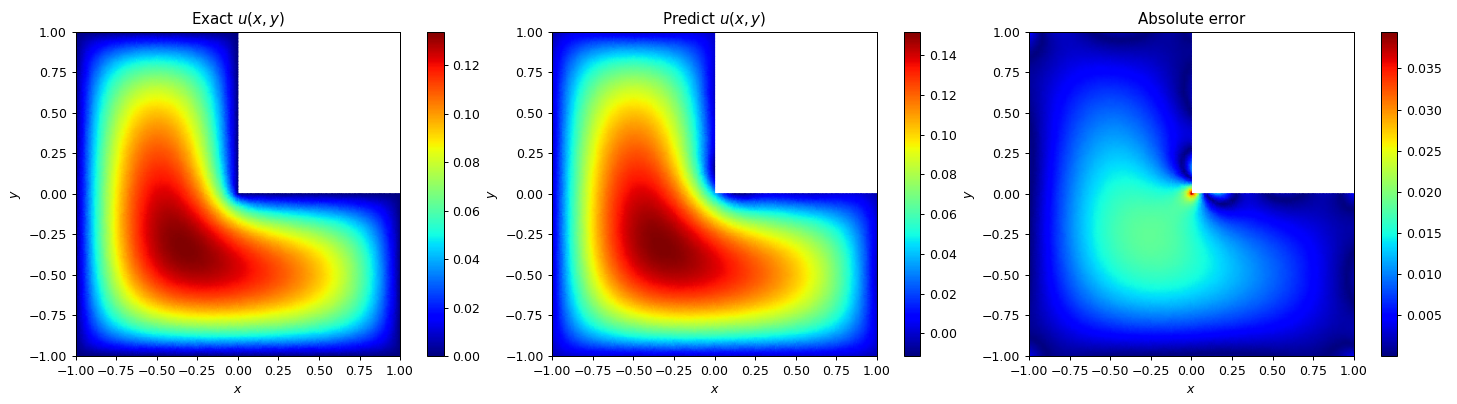

In [18]:
fig = plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
# plt.pcolor(XX,TT, S_test, cmap='jet')
tpc = plt.tripcolor(triang, Y_test, cmap='jet', shading='gouraud')
plt.colorbar(tpc)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Exact $u(x,y)$')
plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.tight_layout()
# plt.axis('off')

plt.subplot(1,3,2)
# plt.pcolor(XX,TT, S_pred, cmap='jet')
tpc = plt.tripcolor(triang, Y_pred, cmap='jet', shading='gouraud')
plt.colorbar(tpc)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Predict $u(x,y)$')
plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.tight_layout()
# plt.axis('off')

plt.subplot(1,3,3)
# plt.pcolor(XX,TT, S_pred - S_test, cmap='jet')
tpc = plt.tripcolor(triang, abs(Y_pred - Y_test), cmap='jet', shading='gouraud')
plt.colorbar(tpc)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Absolute error')
plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.tight_layout()
# plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


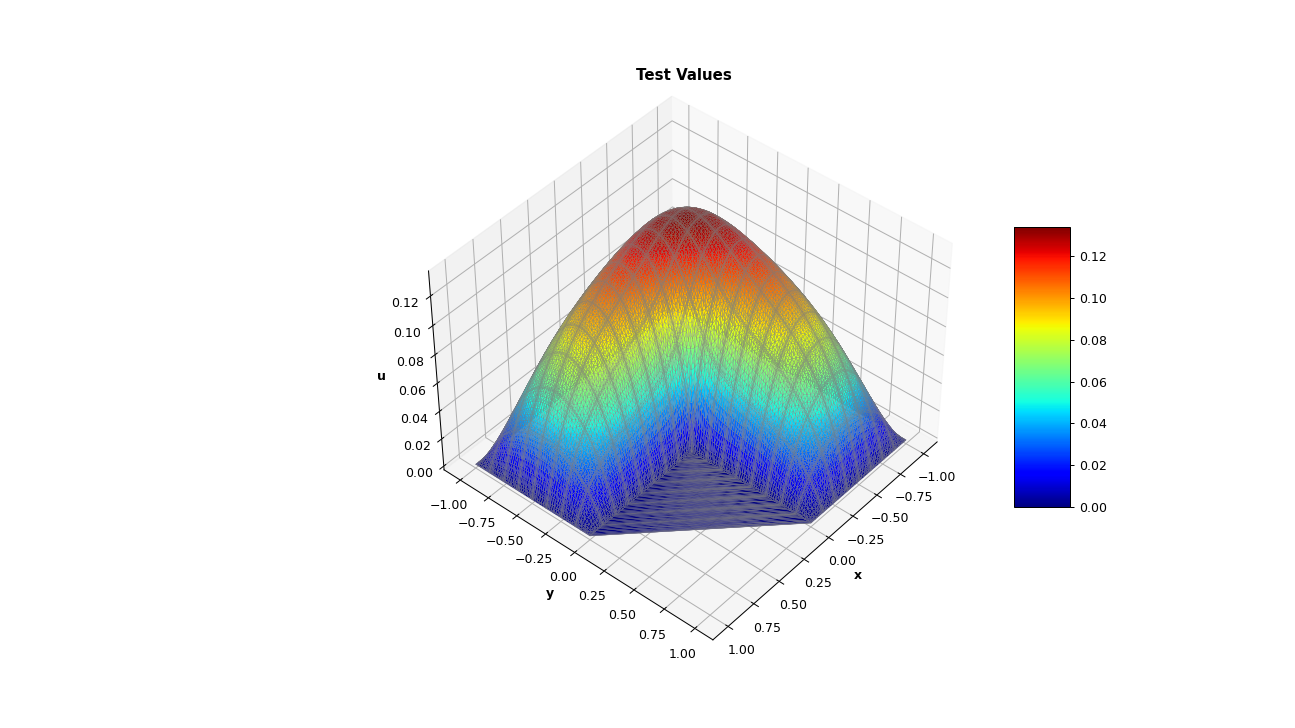

In [19]:
fig = plt.figure(figsize =(16, 9)) 
ax = plt.axes(projection ='3d') 
trisurf = ax.plot_trisurf(X, Y, Y_test,
                         cmap = 'jet',
                         linewidth = 0.2,
                         antialiased = True,
                         edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Test Values', fontweight='bold')
# Adding labels
ax.set_xlabel('x', fontweight ='bold')
ax.set_ylabel('y', fontweight ='bold')
ax.set_zlabel('u', fontweight ='bold')
plt.show()

<IPython.core.display.Javascript object>


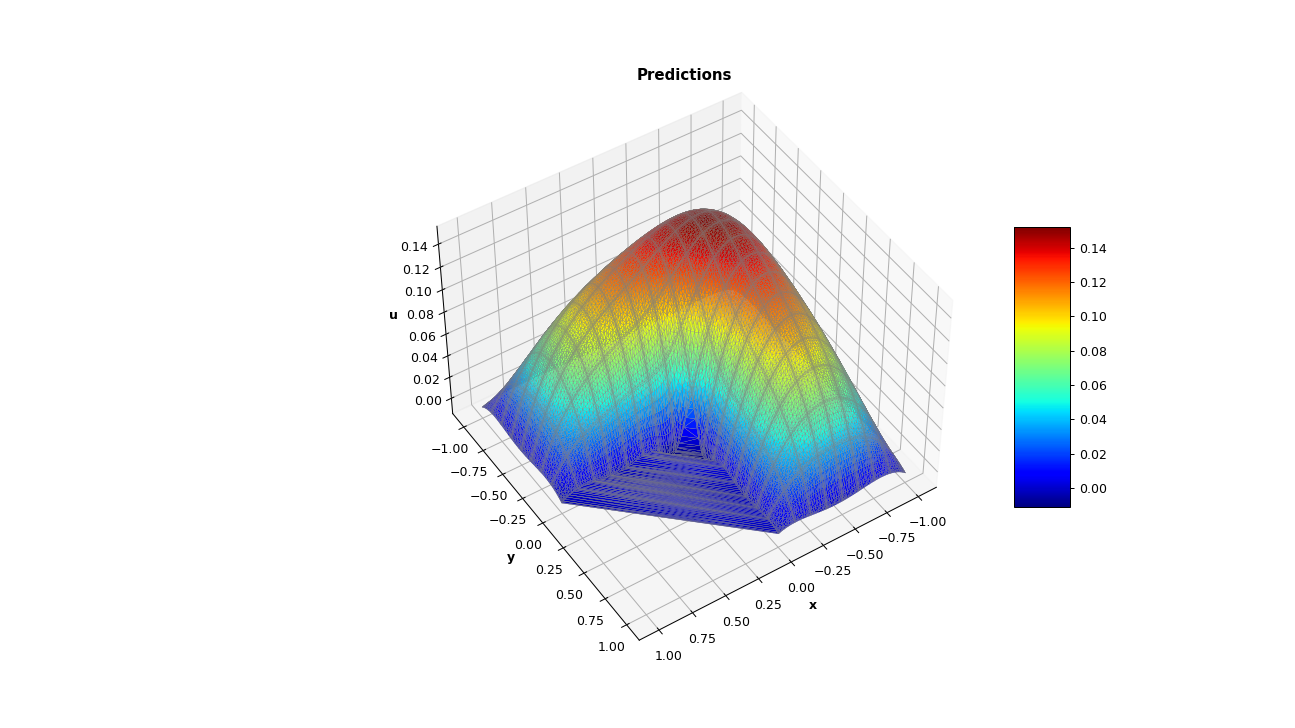

In [20]:
fig = plt.figure(figsize =(16, 9)) 
ax = plt.axes(projection ='3d') 
trisurf = ax.plot_trisurf(X, Y, Y_pred,
                         cmap = 'jet',
                         linewidth = 0.2,
                         antialiased = True,
                         edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Predictions', fontweight='bold')
# Adding labels
ax.set_xlabel('x', fontweight ='bold')
ax.set_ylabel('y', fontweight ='bold')
ax.set_zlabel('u', fontweight ='bold')
plt.show()

<IPython.core.display.Javascript object>


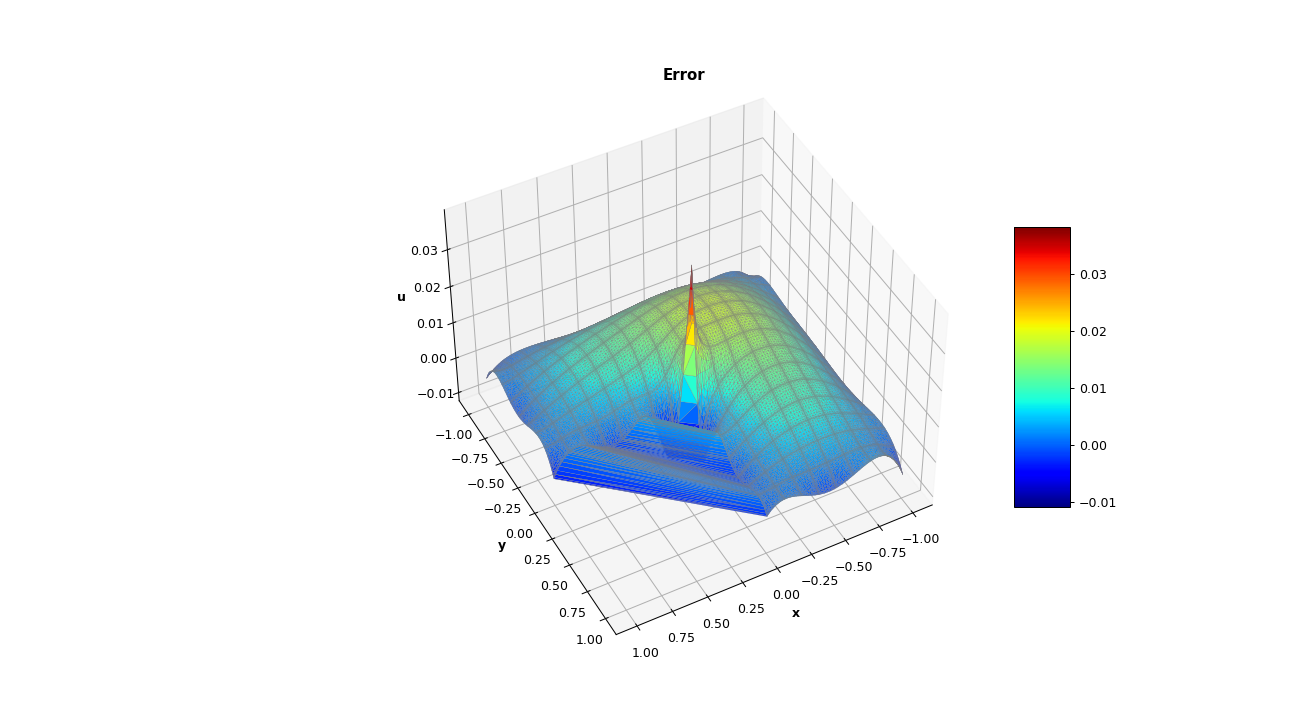

In [21]:
fig = plt.figure(figsize =(16, 9)) 
ax = plt.axes(projection ='3d') 
trisurf = ax.plot_trisurf(X, Y, Y_pred - Y_test,
                         cmap = 'jet',
                         linewidth = 0.2,
                         antialiased = True,
                         edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Error', fontweight='bold')
# Adding labels
ax.set_xlabel('x', fontweight ='bold')
ax.set_ylabel('y', fontweight ='bold')
ax.set_zlabel('u', fontweight ='bold')
plt.show()